In [1]:
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler



In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
df = pd.read_csv('D:/PycharmProjects/pythonProject/train_test_combine_w_lag.csv',header = 0)
features = ['Chl_current','Ammonia Nitrogen','NOx','Dissolved Oxygen','pH','Water Temperature','Turbidity','Total Phosphorus','Air Temperature','Specific Humidity','Wind Speed','Precipitation','Shortwave radiation flux','Developed Percent']
x = df.drop(columns=['Agricultural Percent','Chl_1m_lag'])
y = df["Chl_1m_lag"]

In [4]:
x.head()

,Chl_current,Ammonia Nitrogen,NOx,Dissolved Oxygen,pH,Water Temperature,Turbidity,Total Phosphorus,Air Temperature,Specific Humidity,Wind Speed,Precipitation,Shortwave Radiation Flux,Developed Percent
0,2.540000,0.120000,0.010000,6.920000,7.94,24.120000,0.500000,0.004000,20.610000,0.012005,1.269212,80.1024,170.950,0.950742
1,3.759632,0.082718,0.070539,7.040000,8.03,21.970000,0.901990,0.007586,22.730000,0.013627,2.976928,56.9728,210.145,0.950742
2,2.860000,0.060000,0.020000,6.633333,8.04,26.016667,0.500000,0.006000,24.400000,0.014794,2.124735,69.8112,248.080,0.950742
3,3.692863,0.080370,0.070048,6.820000,7.99,24.906667,1.019418,0.007491,24.030039,0.013869,1.518190,136.8320,244.566,0.950742
4,5.130000,0.110000,0.030000,5.820000,8.00,27.086667,1.000000,0.007000,26.550000,0.016619,2.083387,104.5632,272.162,0.950742


In [5]:
features = list(x.columns)
features

['Chl_current',
 'Ammonia Nitrogen',
 'NOx',
 'Dissolved Oxygen',
 'pH',
 'Water Temperature',
 'Turbidity',
 'Total Phosphorus',
 'Air Temperature',
 'Specific Humidity',
 'Wind Speed',
 'Precipitation',
 'Shortwave Radiation Flux',
 'Developed Percent']

In [6]:
# train data are from 1997 to 2015, test data are from 2016 to 2020
# train 79% test 21%

# original data without transforming
Xtrain = x[:2736]
Ytrain = y[:2736]
Xtest = x.tail(720)
Ytest = y.tail(720)

'''
Xtrain = train_data.drop(columns=['Agricultural Percent','Chl_1m_lag'])
Xtest = test_data.drop(columns=['Agricultural Percent','Chl_1m_lag'])
Ytrain = train_data["Chl_1m_lag"]
Ytest = test_data["Chl_1m_lag"]
'''

'\nXtrain = train_data.drop(columns=[\'Agricultural Percent\',\'Chl_1m_lag\'])\nXtest = test_data.drop(columns=[\'Agricultural Percent\',\'Chl_1m_lag\'])\nYtrain = train_data["Chl_1m_lag"]\nYtest = test_data["Chl_1m_lag"]\n'

In [7]:
Xtrain = x[:2736]
Ytrain = y[:2736]
Xtest = x.tail(720)
Ytest = y.tail(720)

In [19]:
# Grid search
# Origin data
best_score = 0
for n_estimators in [100,200,400]:
    for criterion in ['squared_error','absolute_error']:
        for max_depth in [10,50,100]:
            for min_samples_split in [2,4,8,16]:
                for min_samples_leaf in [1,2,4,8]:
                    for max_features in [0.6,0.8,1.0]:
                        for bootstrap in [True]:
                            for max_samples in [0.8,0.9,1.0]:
                                for ccp_alpha in [0,1,10,100,1000]:


                                    ETR = ExtraTreesRegressor(n_estimators = n_estimators, criterion = criterion,max_depth = max_depth, 
                                                                min_samples_split = min_samples_split,min_samples_leaf = min_samples_leaf,
                                                               max_features = max_features,bootstrap = bootstrap, max_samples = max_samples,
                                                             ccp_alpha = ccp_alpha, n_jobs=-1)

                                    ETR.fit(Xtrain,Ytrain)
                                    score = ETR.score(Xtest,Ytest)
                                    if score > best_score:
                                        best_score = score
                                        best_parameters = {'n_estimators':n_estimators,'criterion':criterion,'max_depth':max_depth,
                                                          'min_samples_split':min_samples_split,'min_samples_leaf':min_samples_leaf,
                                                           'max_features':max_features,'bootstrap':bootstrap,'max_samples':max_samples,
                                                          'ccp_alpha':ccp_alpha}


print("Best score:{:.3f}".format(best_score))
print("Best parameters:{}".format(best_parameters))

# Origin data

Best score:0.453
Best parameters:{'n_estimators': 400, 'criterion': 'absolute_error', 'max_depth': 100, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': 0.6, 'bootstrap': True, 'max_samples': 1.0, 'ccp_alpha': 0}


In [20]:
# Grid search
# Origin data
best_score = 0
for n_estimators in [100,200,400]:
    for criterion in ['squared_error','absolute_error']:
        for max_depth in [10,50,100]:
            for min_samples_split in [2,4,8,16]:
                for min_samples_leaf in [1,2,4,8]:
                    for max_features in [0.6,0.8,1.0]:
                        for bootstrap in [True,False]:
                            for ccp_alpha in [0,1,10,100,1000]:


                                ETR = ExtraTreesRegressor(n_estimators = n_estimators, criterion = criterion,max_depth = max_depth, 
                                                            min_samples_split = min_samples_split,min_samples_leaf = min_samples_leaf,
                                                           max_features = max_features,bootstrap = bootstrap,ccp_alpha = ccp_alpha,
                                                         n_jobs=-1)

                                ETR.fit(Xtrain,Ytrain)
                                score = ETR.score(Xtest,Ytest)
                                if score > best_score:
                                    best_score = score
                                    best_parameters = {'n_estimators':n_estimators,'criterion':criterion,'max_depth':max_depth,
                                                      'min_samples_split':min_samples_split,'min_samples_leaf':min_samples_leaf,
                                                       'max_features':max_features,'bootstrap':bootstrap,'ccp_alpha':ccp_alpha}


print("Best score:{:.3f}".format(best_score))
print("Best parameters:{}".format(best_parameters))

# Origin data

Best score:0.462
Best parameters:{'n_estimators': 100, 'criterion': 'absolute_error', 'max_depth': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 0.6, 'bootstrap': False, 'ccp_alpha': 0}


In [188]:
# ETR

# 1.Model
ETR = ExtraTreesRegressor(n_estimators = 100, criterion = 'absolute_error',max_depth = 60, min_samples_split = 2,min_samples_leaf = 2,
                          max_features = 0.6,bootstrap = False,n_jobs=-1)

# 2.Train
ETR.fit(Xtrain,Ytrain)

# 3.Scores
y_predict_xtrain = ETR.predict(Xtrain)
y_predict_xtest = ETR.predict(Xtest)

score_train = metrics.r2_score(Ytrain, y_predict_xtrain)
score_test = metrics.r2_score(Ytest, y_predict_xtest)
MAE_train = metrics.mean_absolute_error(Ytrain, y_predict_xtrain)
MAE_test = metrics.mean_absolute_error(Ytest, y_predict_xtest)
MSE_train = metrics.mean_squared_error(Ytrain, y_predict_xtrain)
MSE_test = metrics.mean_squared_error(Ytest, y_predict_xtest)
MAPE_train = metrics.mean_absolute_percentage_error(Ytrain, y_predict_xtrain)
MAPE_test = metrics.mean_absolute_percentage_error(Ytest, y_predict_xtest)

print('R2 for train:', score_train)
print('R2 for test:', score_test)
print('MAE for train:', MAE_train)
print('MAE for test:', MAE_test)
print('MSE for train:', MSE_train)
print('MSE for test:', MSE_test)
print('MAPE for train', MAPE_train)
print('MAPE for test', MAPE_test)

R2 for train: 0.9058749975726337
R2 for test: 0.4681700080393765
MAE for train: 0.21288057918100878
MAE for test: 0.7235156280431876
MSE for train: 0.28093945942844467
MSE for test: 1.5407580864197876
MAPE for train 0.2001042838764133
MAPE for test 0.5832065349551507


In [189]:
# same as MAPE
PercentBias_train = np.mean(np.abs((Ytrain - y_predict_xtrain) / Ytrain)) * 100
PercentBias_train

20.010428387641372

In [190]:
importance = ETR.feature_importances_
print(importance)
print([*zip(features,ETR.feature_importances_)])

[0.36232384 0.03563775 0.03665577 0.03731871 0.04771576 0.03645587
 0.04204123 0.04324588 0.03341743 0.03218264 0.02896812 0.04244173
 0.04165545 0.17993983]
[('Chl_current', 0.3623238368235692), ('Ammonia Nitrogen', 0.0356377529182925), ('NOx', 0.03665577122199613), ('Dissolved Oxygen', 0.037318705880140954), ('pH', 0.04771575579575725), ('Water Temperature', 0.0364558686891508), ('Turbidity', 0.04204123073174727), ('Total Phosphorus', 0.043245875407901084), ('Air Temperature', 0.03341743040571216), ('Specific Humidity', 0.03218264328727817), ('Wind Speed', 0.028968121270833445), ('Precipitation', 0.04244172763047095), ('Shortwave Radiation Flux', 0.041655454257529236), ('Developed Percent', 0.1799398256796207)]


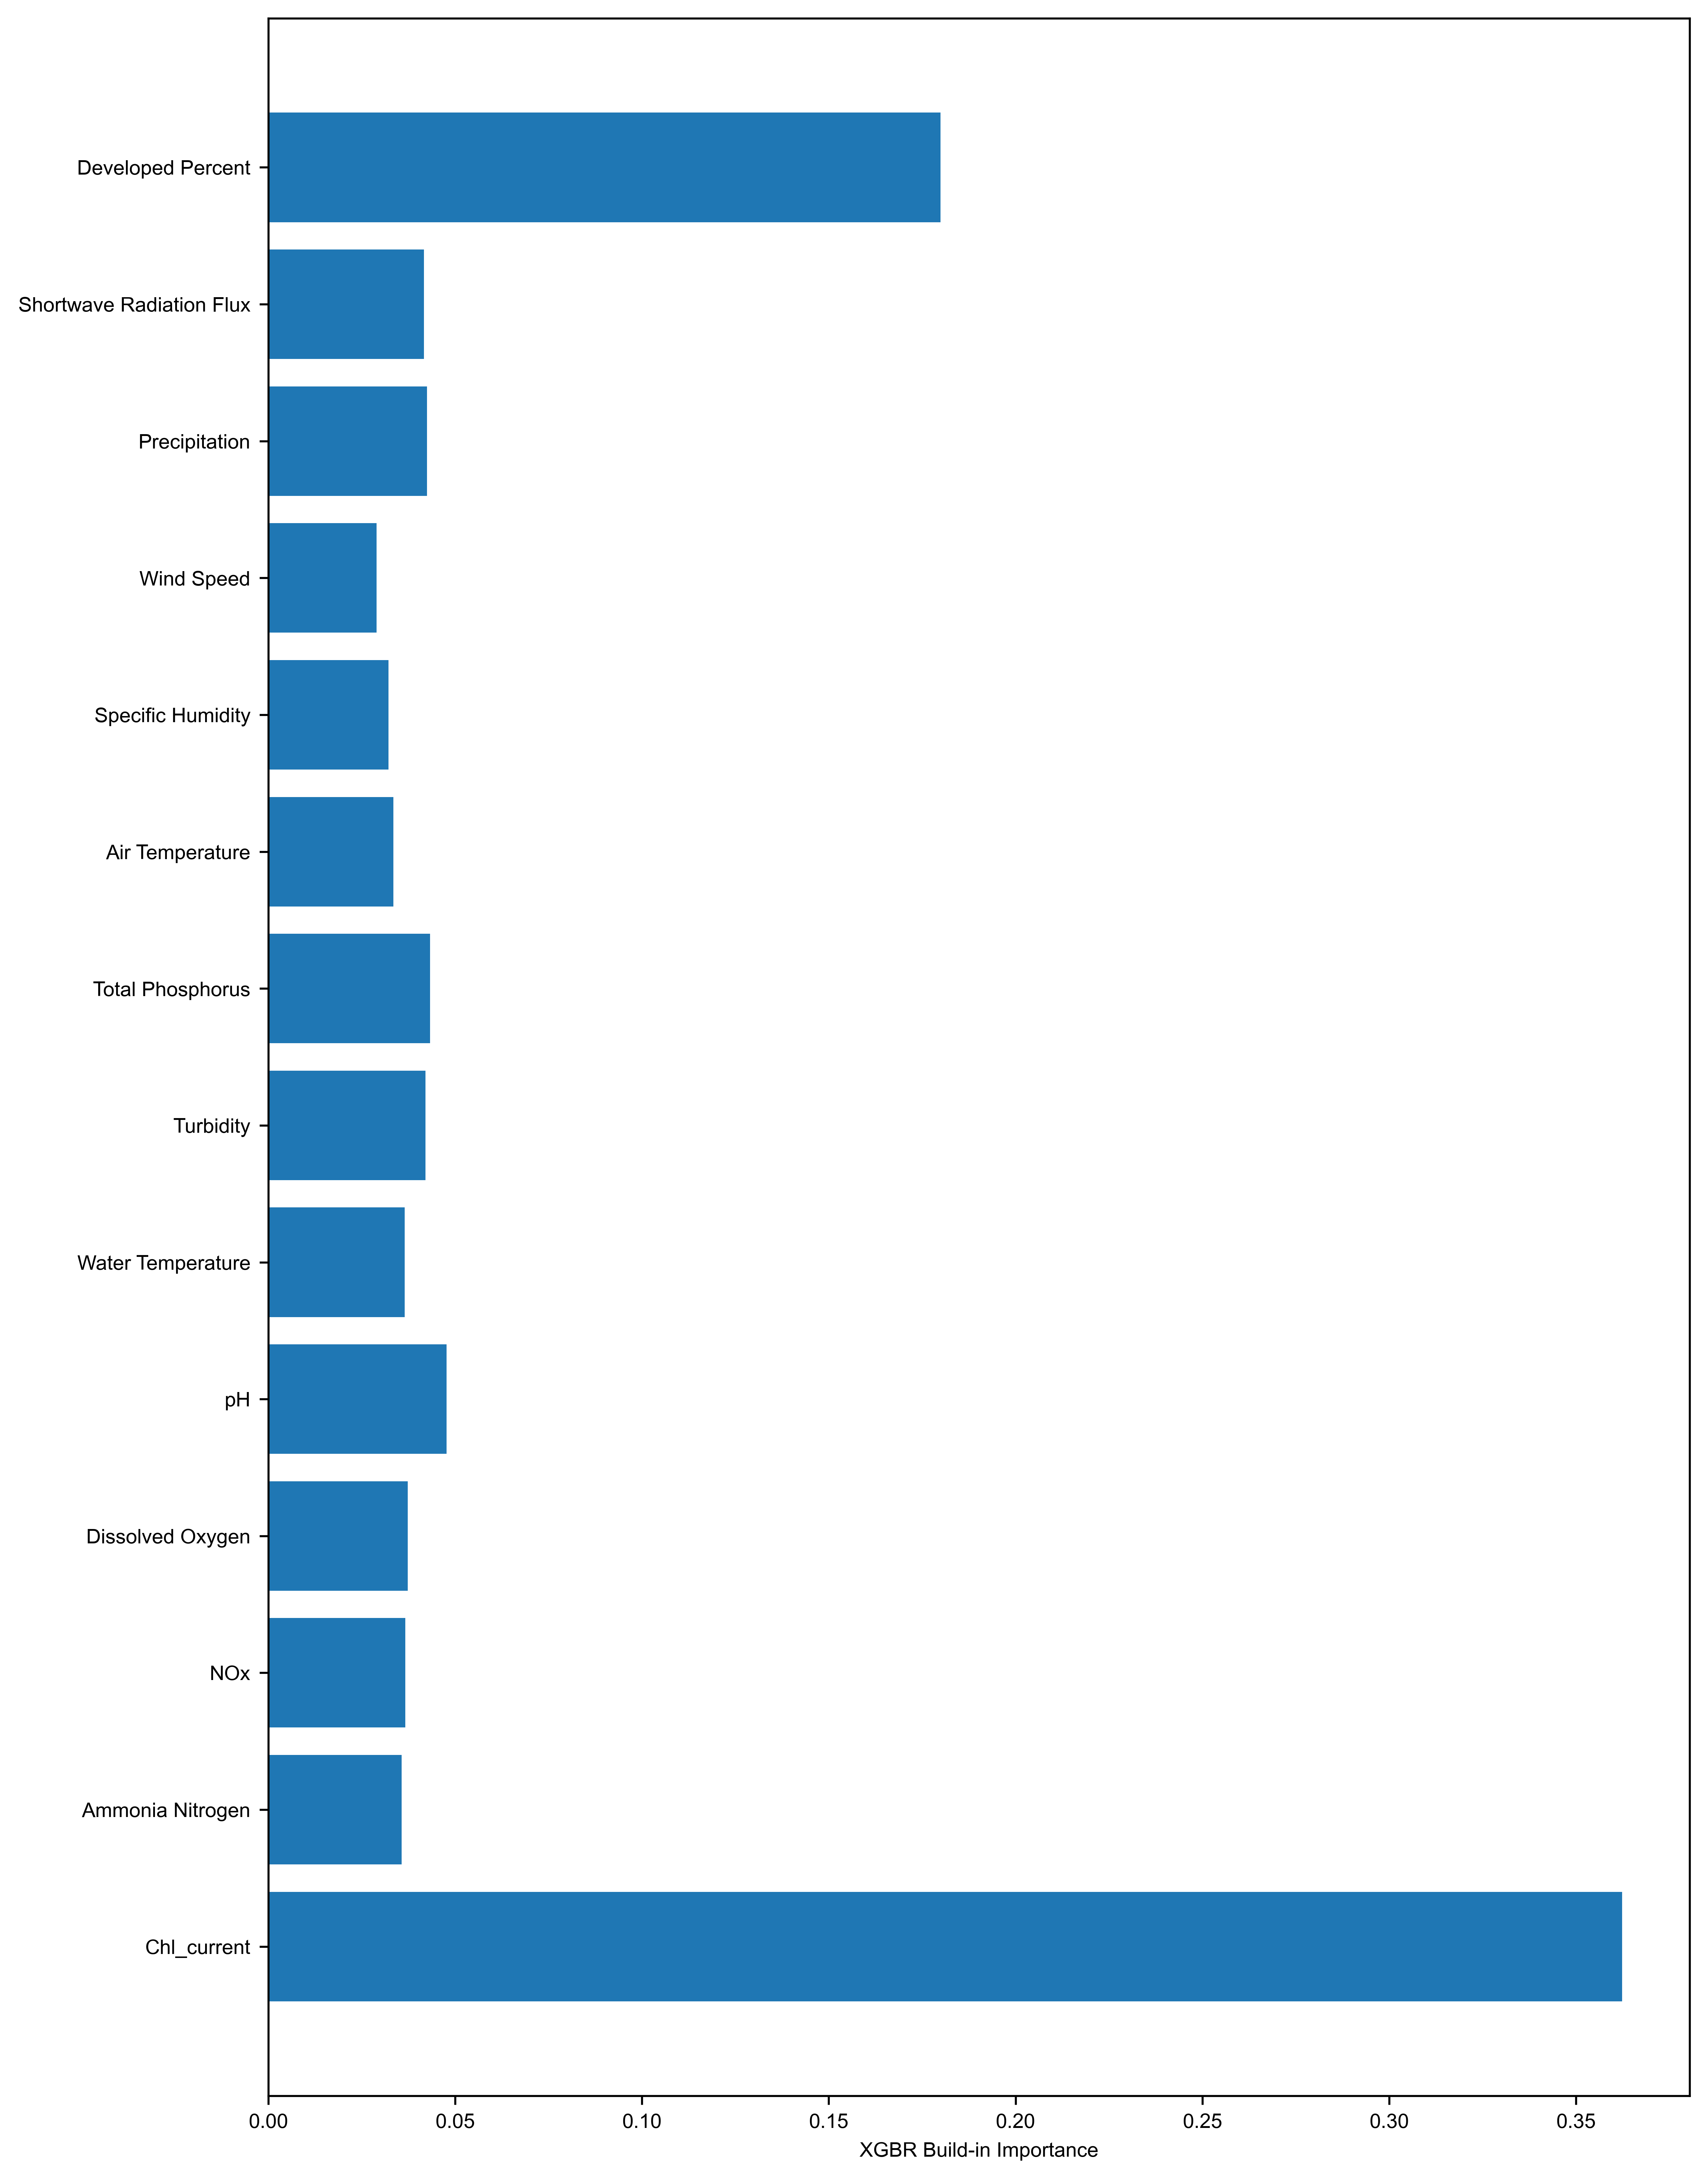

In [191]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
# create dataset
height = ETR.feature_importances_
bars = (features)
plt.figure(dpi=600)
plt.xlabel('XGBR Build-in Importance')
y_pos = np.arange(len(bars))
# Create horizontal bars
plt.barh(y_pos, height)
# Create names on the x-axis
plt.yticks(y_pos, bars)
# Show graphic
plt.show()

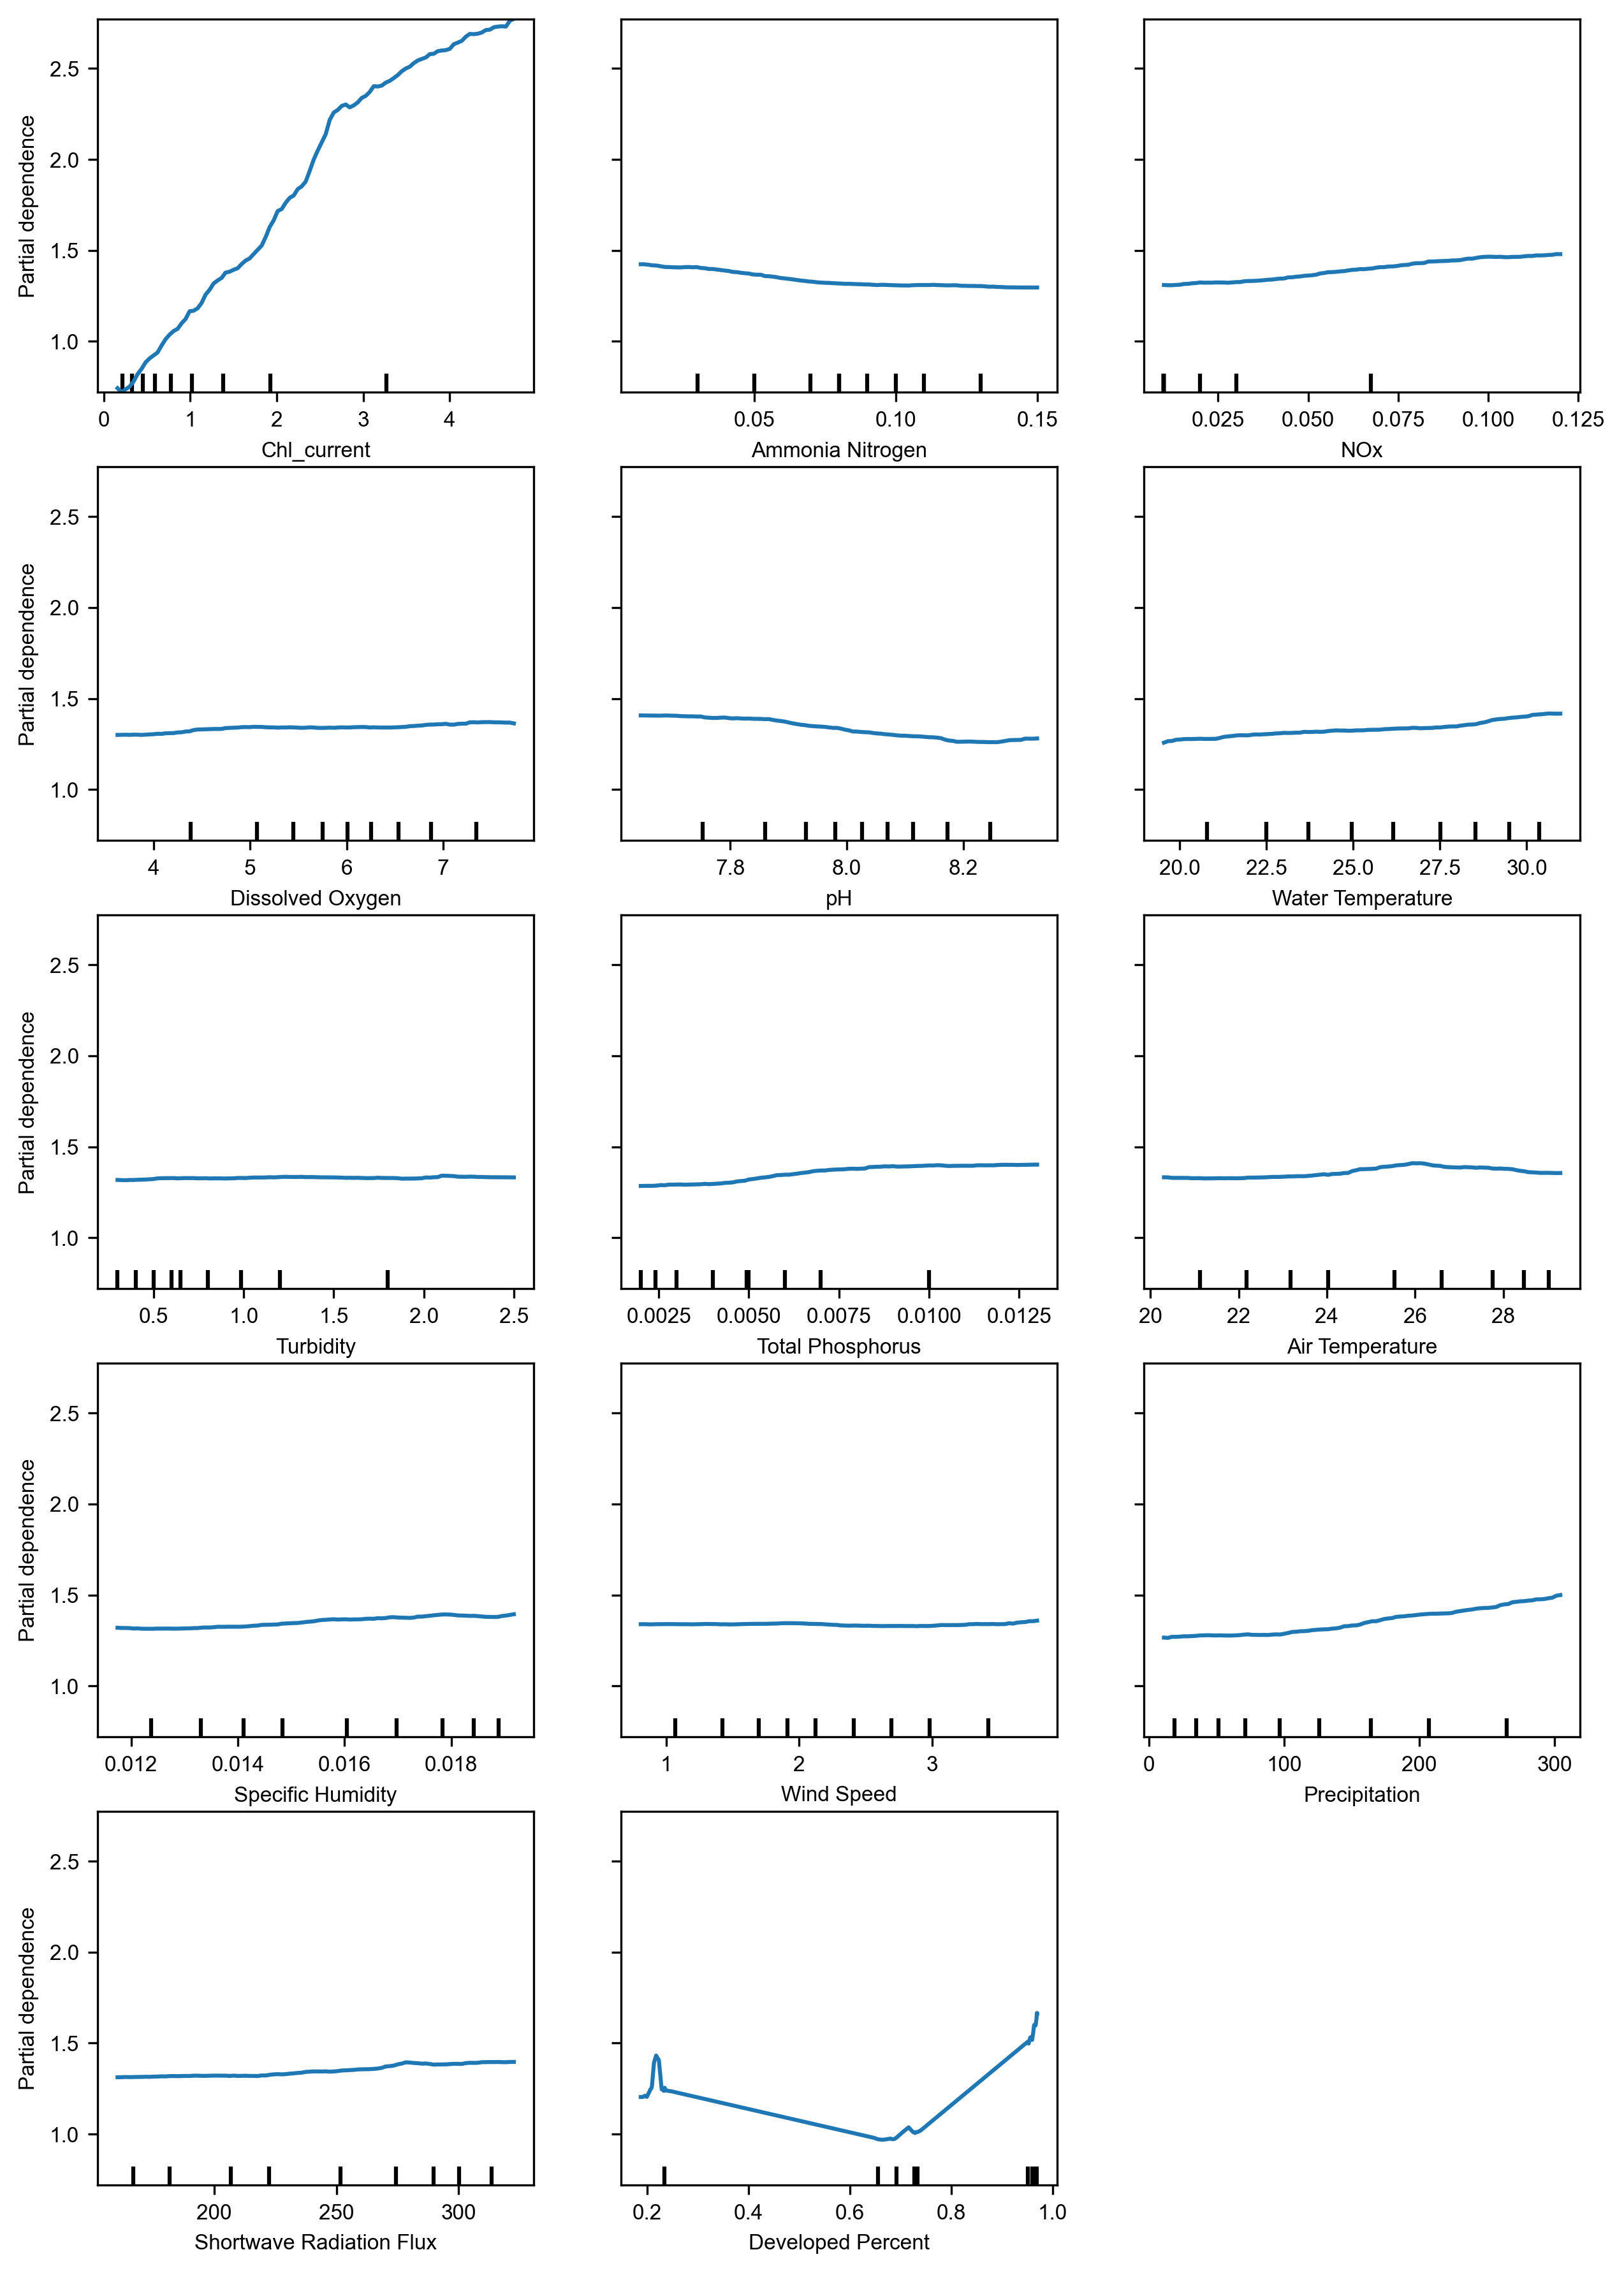

In [192]:
from sklearn.inspection import PartialDependenceDisplay
plt.rcParams.update({'figure.figsize':(10,15), 'figure.dpi':300,'font.size': 8,'font.family':'arial'})
disp1 = PartialDependenceDisplay.from_estimator(ETR, x,
                                                [0,1,2,3,4,5,6,7,8,9,10,11,12,13])

[ 3.24541727e-01  1.25165595e-02  3.68314042e-02  6.99090429e-03
  1.34015910e-02  3.95005998e-03  5.25399100e-03 -3.11082413e-04
  2.77026676e-03  2.34568099e-03  3.16422823e-03  1.48325275e-02
  1.34159409e-02  1.58225518e-01]


Text(0.5, 0, 'XGBR Permutation Importance')

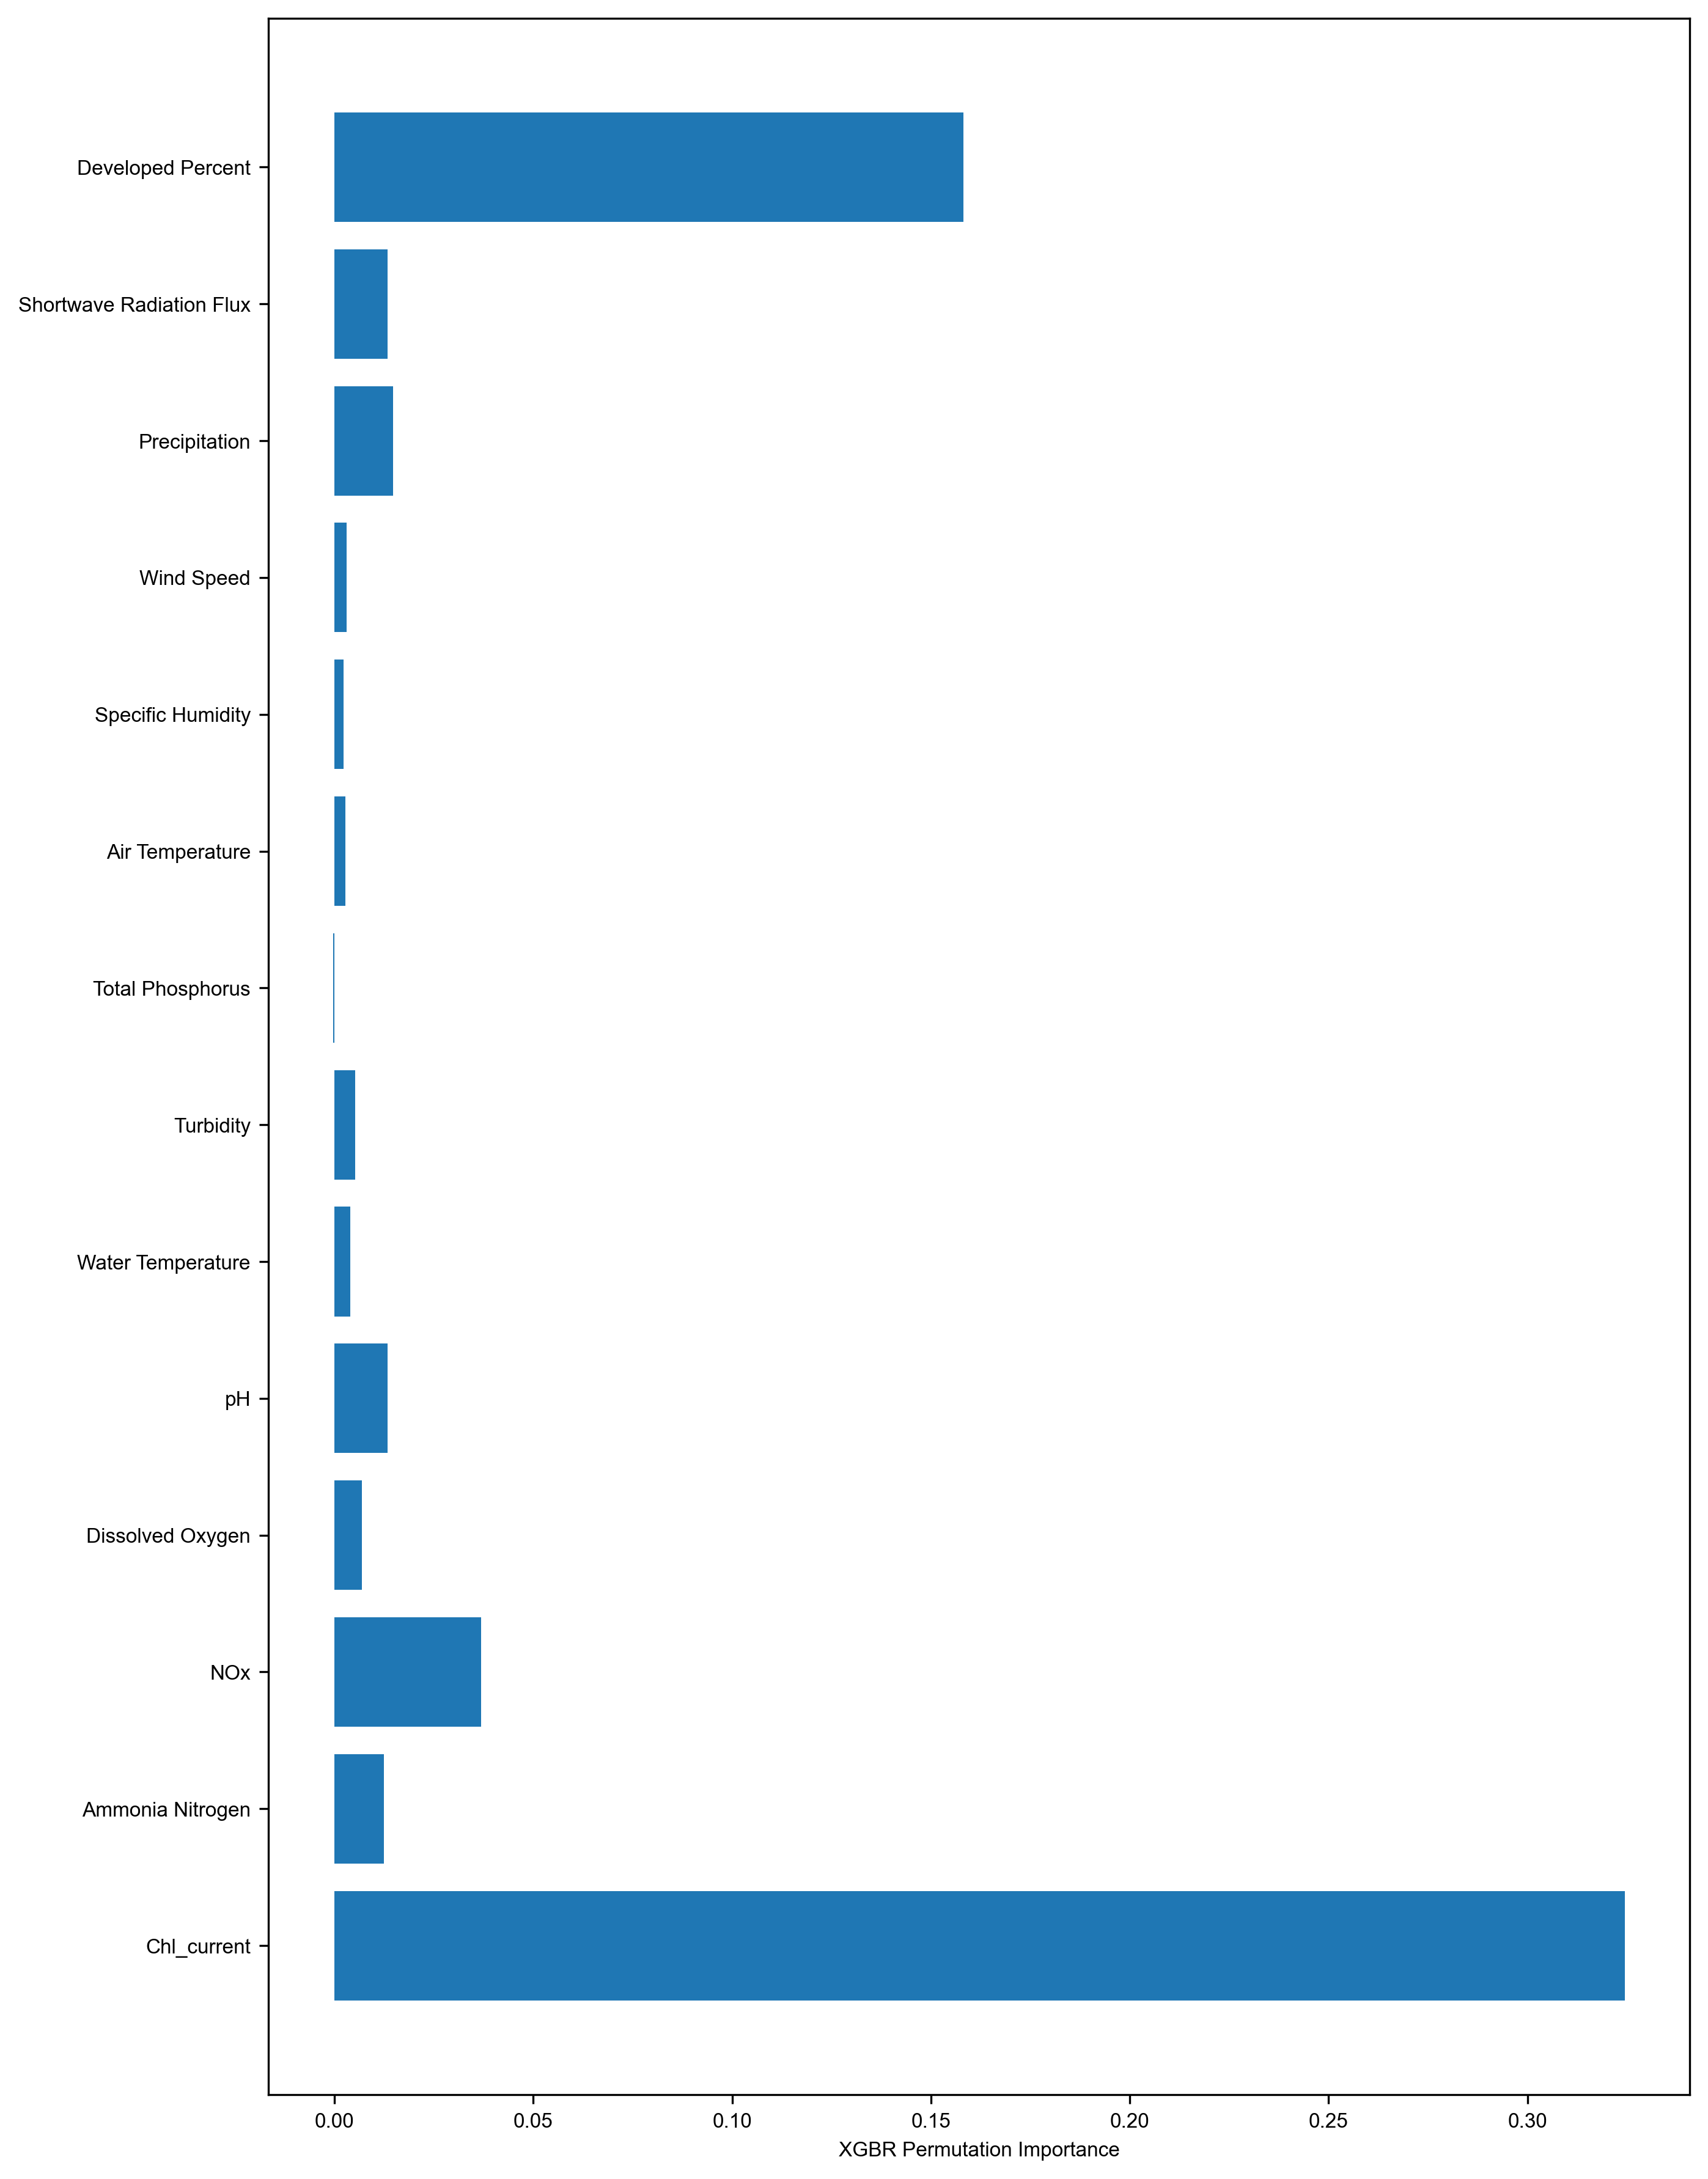

In [193]:
from sklearn.inspection import permutation_importance
perm_importance = permutation_importance(ETR, Xtest, Ytest)
print(perm_importance.importances_mean)
# sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(dpi=300)
plt.barh(features, perm_importance.importances_mean)
plt.xlabel("XGBR Permutation Importance")

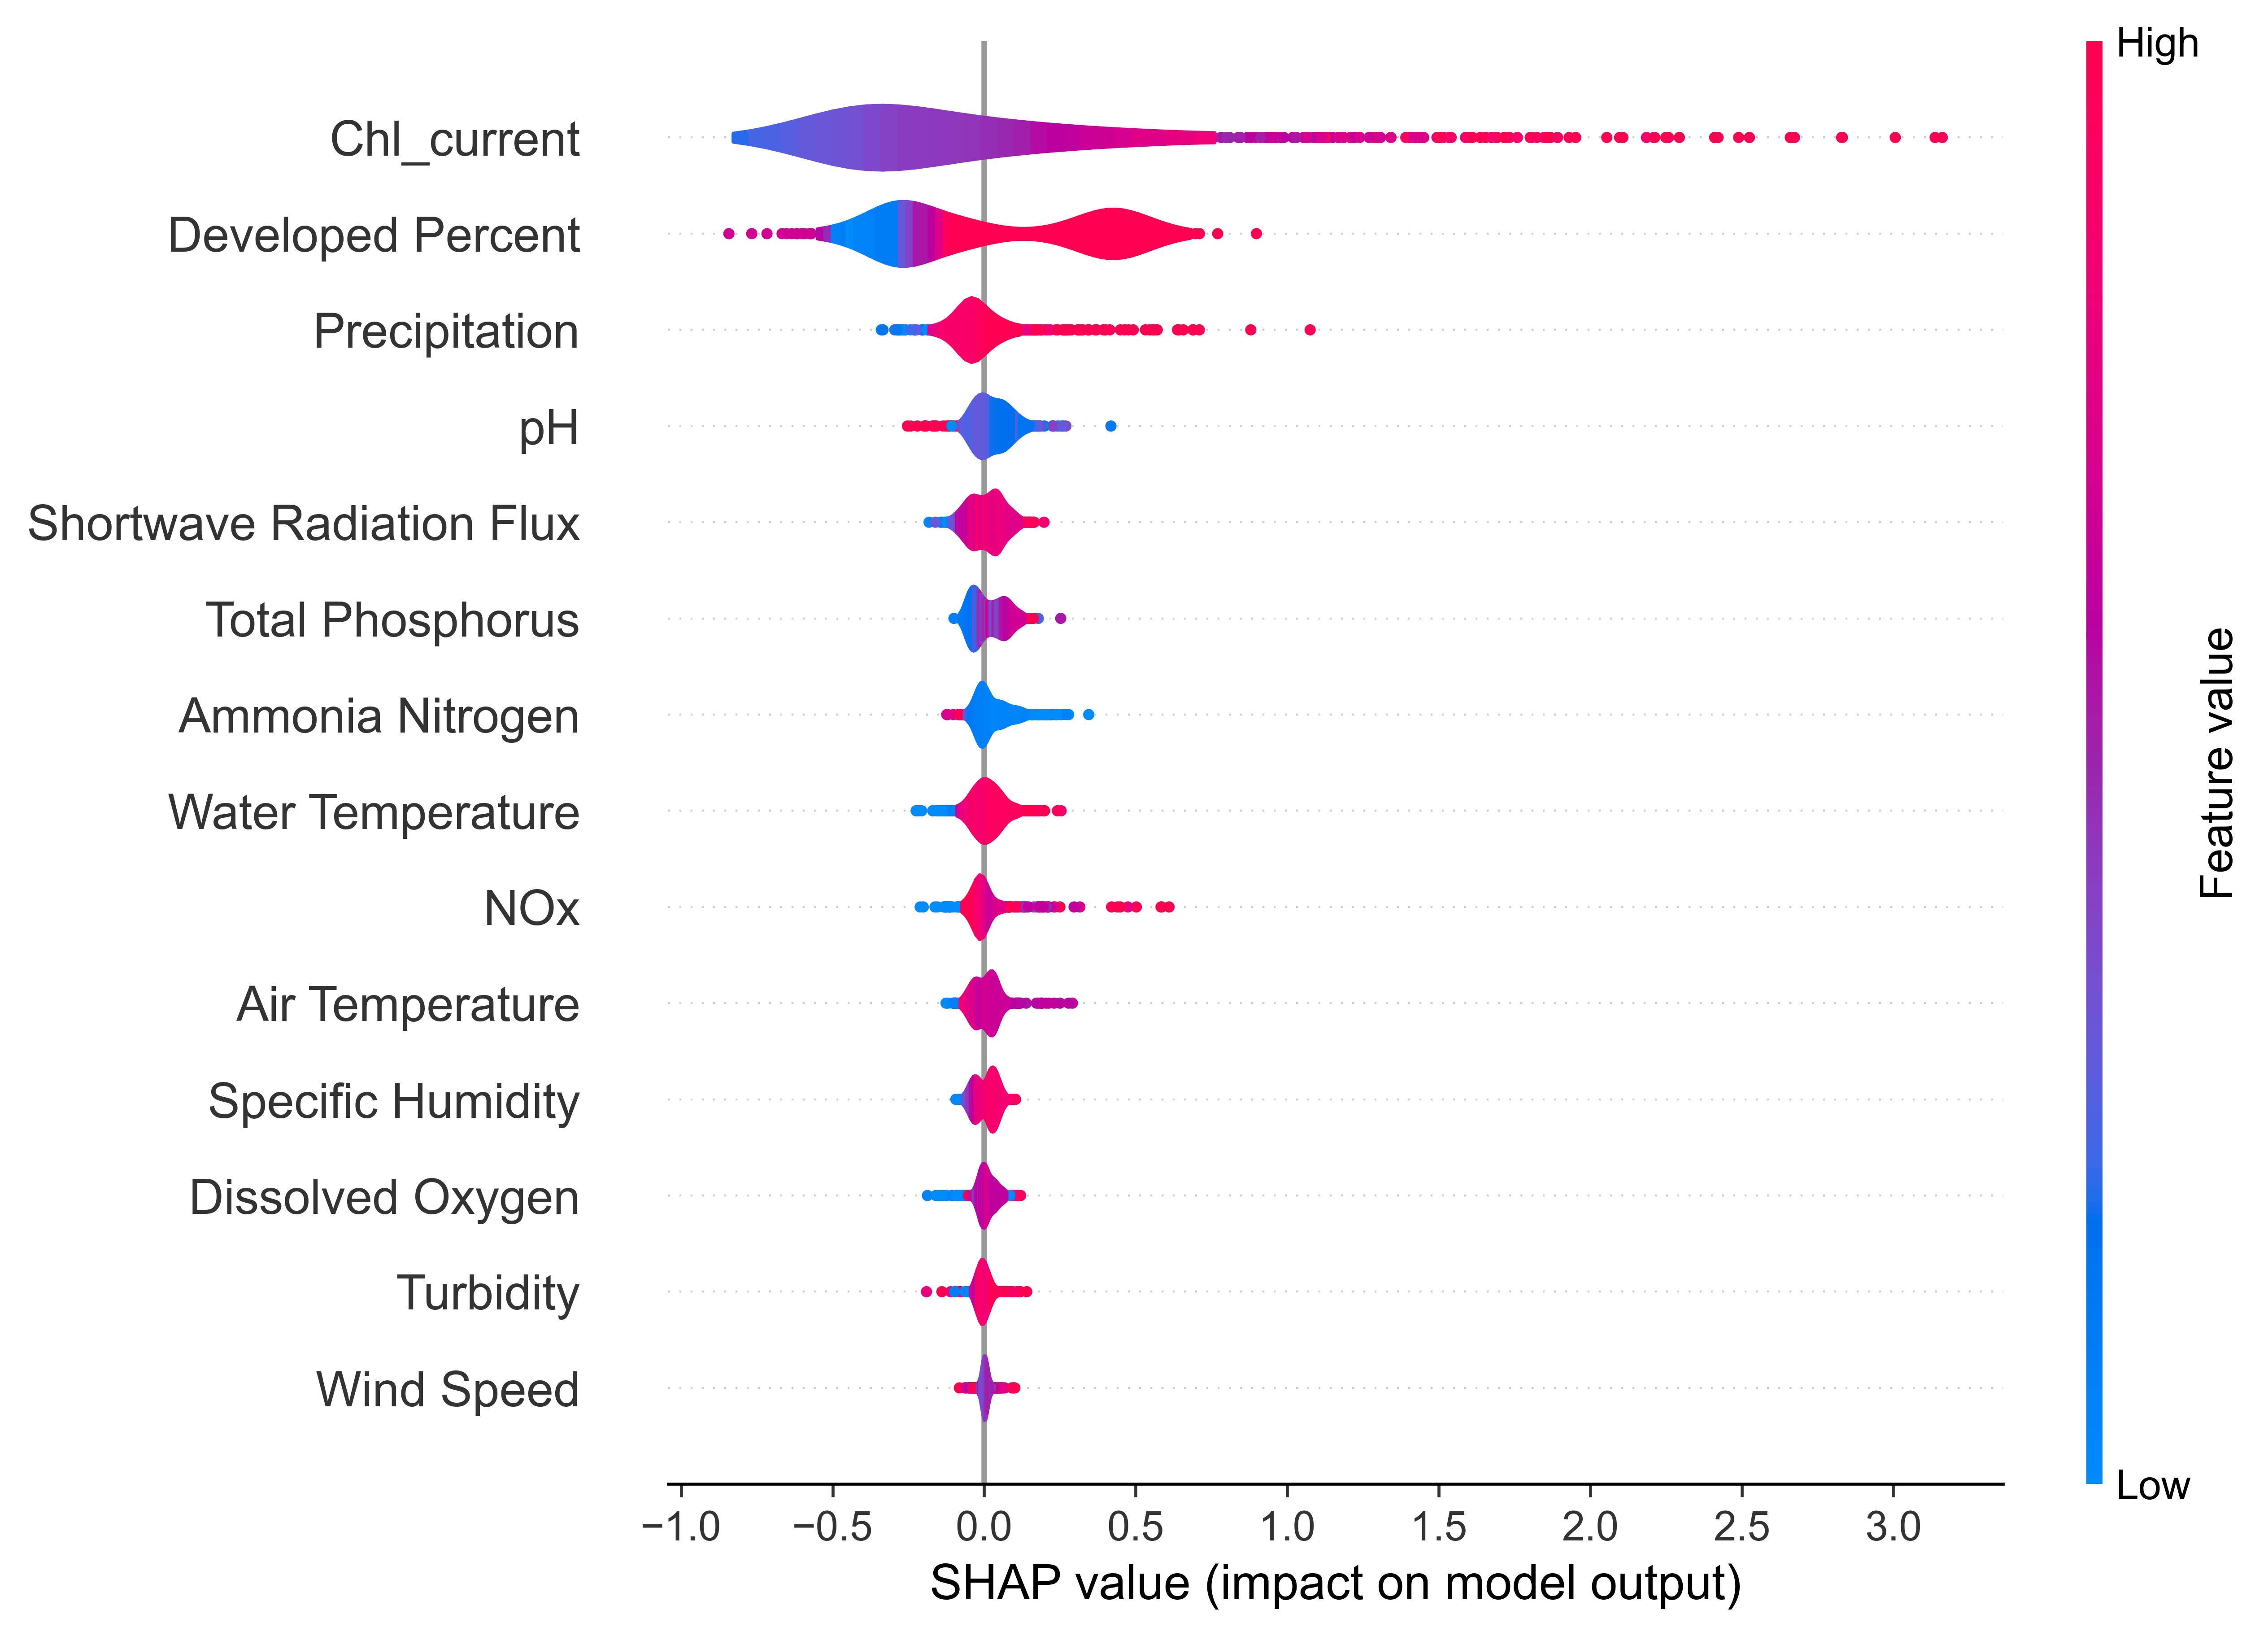

In [194]:
import shap
explainer = shap.TreeExplainer(ETR)
shap_values = explainer.shap_values(Xtest)
plt.figure(dpi=600)
shap.summary_plot(shap_values, Xtest, plot_type="violin")

In [195]:
shap_sum = np.abs(shap_values).mean(axis=0)
importance_df = pd.DataFrame([Xtest.columns.tolist(), shap_sum.tolist()]).T
importance_df.columns = ['column_name', 'shap_importance']
importance_df = importance_df.sort_values('shap_importance', ascending=False)
importance_df

,column_name,shap_importance
0,Chl_current,0.512321
13,Developed Percent,0.321629
11,Precipitation,0.087328
4,pH,0.054989
12,Shortwave Radiation Flux,0.049595
7,Total Phosphorus,0.04903
1,Ammonia Nitrogen,0.048767
5,Water Temperature,0.044534
2,NOx,0.040104
8,Air Temperature,0.036858


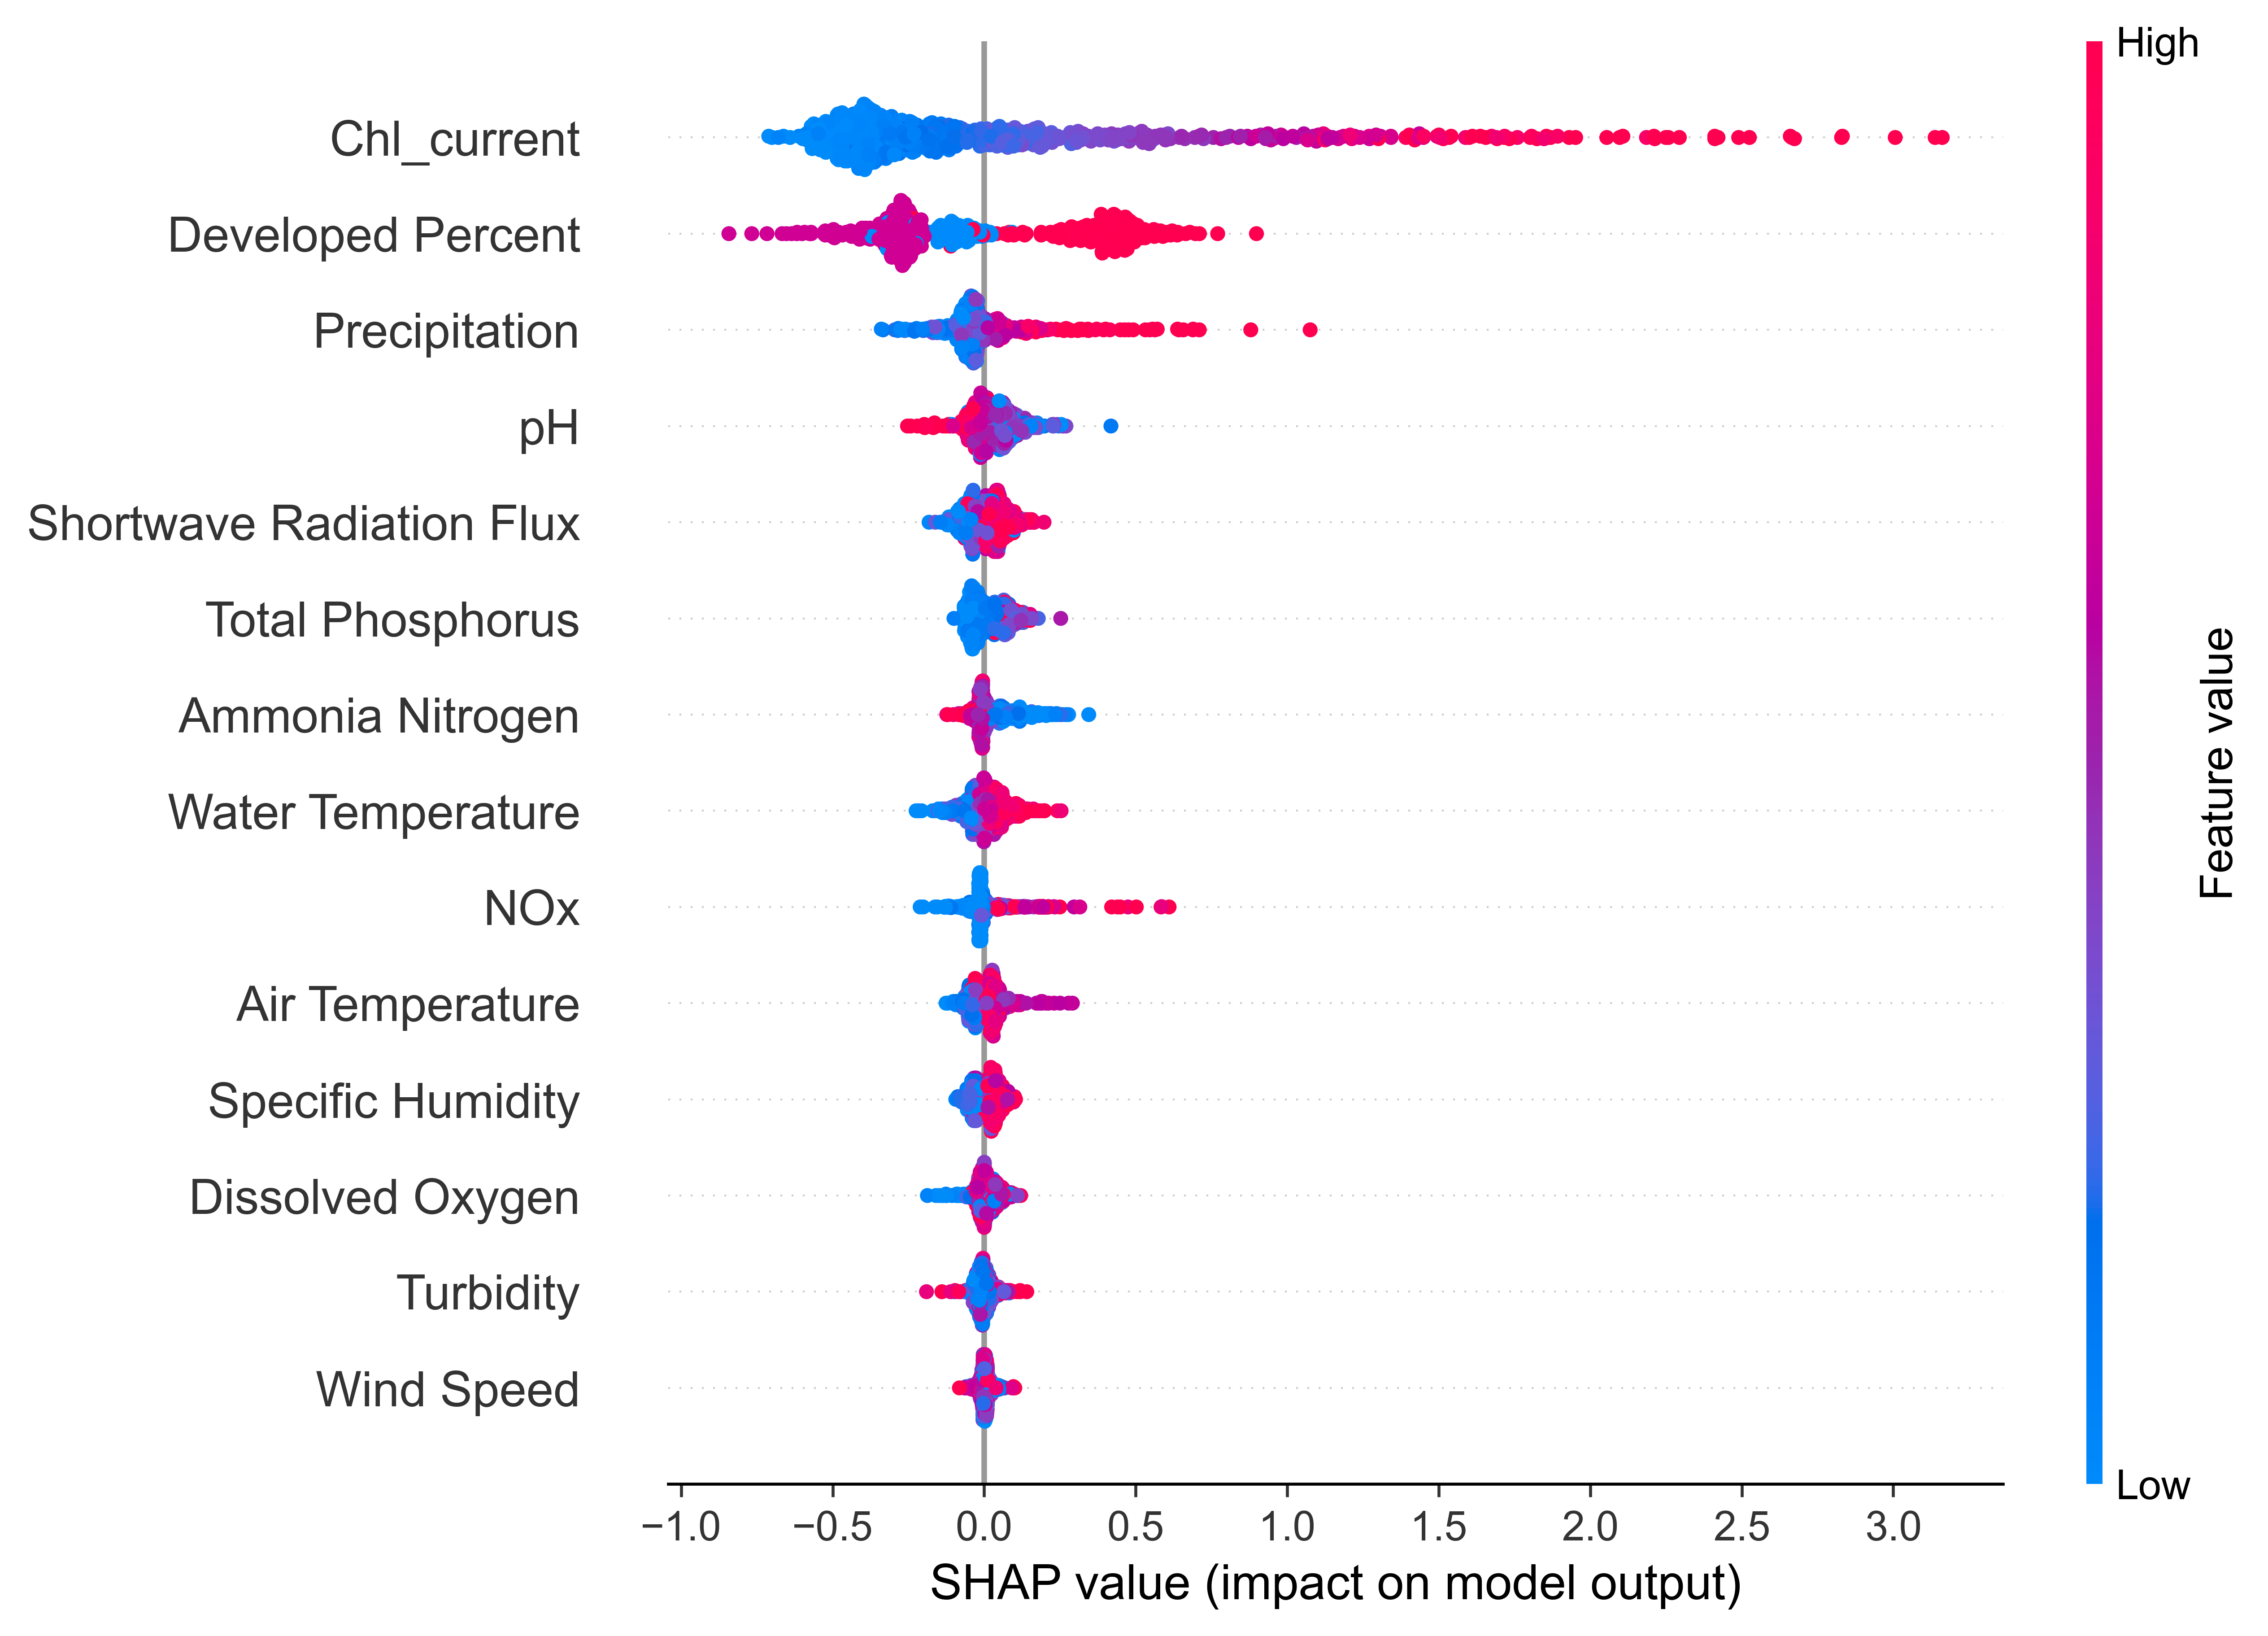

In [196]:
plt.figure(dpi=600)
shap.summary_plot(shap_values, Xtest)

In [197]:
m = pd.Series(y_predict_xtrain, index=Ytrain.index, name='Predicted Chlorophyll-a')

In [198]:
AllY_train = pd.concat([Ytrain,m],axis=1)
AllY_train

,Chl_1m_lag,Predicted Chlorophyll-a
0,3.759632,3.276583
1,2.860000,2.881597
2,3.692863,3.130118
3,5.130000,4.390247
4,3.646510,3.347597
...,...,...
2731,0.860000,0.911843
2732,0.460000,0.579803
2733,0.540000,0.560200
2734,0.210000,0.382855


In [199]:
n = pd.Series(y_predict_xtest, index=Ytest.index, name='Predicted Chlorophyll-a')

In [200]:
AllY_test = pd.concat([Ytest,n],axis=1)
AllY_test

,Chl_1m_lag,Predicted Chlorophyll-a
2736,6.830000,3.117102
2737,4.349878,3.918881
2738,2.740000,2.857494
2739,2.210000,2.506926
2740,3.870000,2.564978
...,...,...
3451,0.480000,1.030415
3452,0.630000,0.916277
3453,0.930000,1.145640
3454,0.650000,0.968820


In [201]:
All_Y = pd.concat([AllY_train,AllY_test],ignore_index = True)
All_Y_sorted = All_Y.sort_index()
All_Y_sorted

,Chl_1m_lag,Predicted Chlorophyll-a
0,3.759632,3.276583
1,2.860000,2.881597
2,3.692863,3.130118
3,5.130000,4.390247
4,3.646510,3.347597
...,...,...
3451,0.480000,1.030415
3452,0.630000,0.916277
3453,0.930000,1.145640
3454,0.650000,0.968820


In [202]:
All_Y.loc[0]

Chl_1m_lag                 3.759632
Predicted Chlorophyll-a    3.276583
Name: 0, dtype: float64

In [203]:
All_Y_sorted.to_excel (r'C:/Users/yanzh/OneDrive - Florida State Students/桌面/export_dataframe.xlsx', index = False, header=True)

In [204]:
import os
import joblib
joblib.dump(ETR, "./ETR_lag.joblib")

['./ETR_lag.joblib']

In [205]:
import os
import joblib
loaded_etr = joblib.load("./ETR_lag.joblib")

In [206]:
# original
aaaa = loaded_etr.predict(x)

In [207]:
aaaa

array([3.27658272, 2.8815966 , 3.13011812, ..., 1.14563978, 0.96882024,
       0.59974374])

In [208]:
len(aaaa)

3456